# Atividade 1 - ADA Estatística

In [6]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

### Questão 1
- Você vai a uma feira de adoção de animais domésticos, e descobre que há 10 gatinhos para adoção. Desses gatos, 5 são adultos (dos quais 3 são fêmeas e 2 são machos); e os outros 5 são filhotes (dos quais 2 são fêmeas e 3 são machos). Ao escolher um gato adulto aleatoriamente para a adoção, qual é a probabilidade do gato escolhido ser macho?

In [7]:
# Criando matriz com os dados
gatos_df = pd.DataFrame({
    'Adulto': [3, 2],
    'Filhote': [2, 3]
}, index=['Fêmea','Macho'])

# Calcular a probalidade de um gato adulto escolhido aleatoriamente ser macho
probalidade = gatos_df.loc['Macho','Adulto'] / gatos_df['Adulto'].sum()

gatos_df

,Adulto,Filhote
Fêmea,3,2
Macho,2,3


### Questão 3

- Ao analisar a distribuição de notas dos candidatos na prova de um processo seletivo (notas variando de 0 a 10), descobriu-se que a nota média foi de 8,7; e a mediana foi de 7,1. Ao visualizar a distribuição, ela é unimodal. Sabendo destas informações, podemos afirmar que:


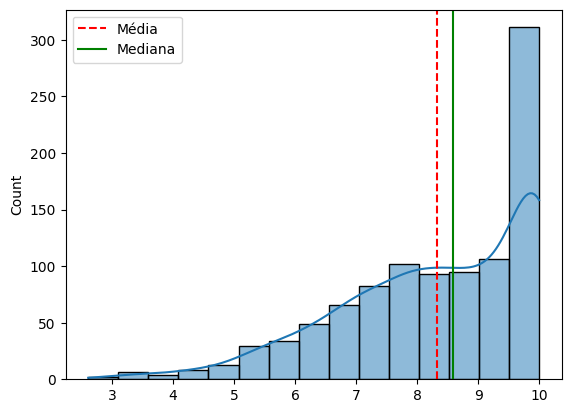

In [16]:
# Gerando dados aleatórios 
np.random.seed(0)
dados_notas = np.random.normal(loc=8.7, scale=2, size=1000)
dados_notas = np.clip(dados_notas, 0, 10) # limitando para dados de 0 a 10

# Criando um gráfico de distribuição
sns.histplot(dados_notas, kde=True)

# Adicionando linhas para a média e a mediana
plt.axvline(np.mean(dados_notas), color='r', linestyle='--', label='Média')
plt.axvline(np.median(dados_notas), color='g', linestyle='-', label='Mediana')

# Adicionando uma legenda
plt.legend()

# Mostrando o gráfico
plt.show()

### Exemplo de gráfico com distribuição unimodal

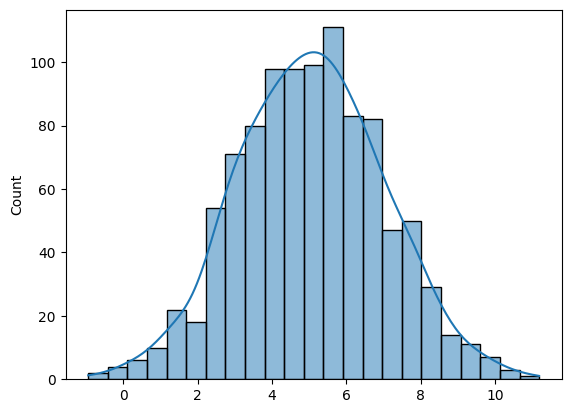

In [14]:
# Gerando dados aleatórios com uma distribuição unimodal
dados = np.random.normal(loc=5, scale=2, size=1000)

# Criando o gráfico
sns.histplot(dados, kde=True)

# Mostrando o gráfico
plt.show()

### Questão 3
- Suponha que os dados de um experimento de uma variável X seja:
10 	2 	15 	11 	9 	3 	7 	15 	12 	5 	8

O valor da variância é:


Variância = Σ (x - μ)² / (N - 1)

Onde:

    Σ denota a soma.
    x é cada valor individual do conjunto de dados.
    μ é a média do conjunto de dados.
    N é o número de valores no conjunto de dados.

In [19]:
# Dados do experimento
dados_x = [10, 2, 15, 11, 9, 3, 7, 15, 12, 5, 8]

# Convertendo para numpy array
dados_x = np.array(dados_x)

# Calculando a soma dos dados
soma = dados_x.sum()

# Calculando a média dos dados
media = dados_x.mean()

# Calulando a variância dos dados
variancia = ((dados_x - media) ** 2).sum() / (dados_x.size - 1)

print(variancia)


19.163636363636364


### Questão 5

- Considere uma amostra aleatória formada por 10 alunos e pelas notas obtidas por eles em matemática e estatística.
Construindo um diagrama de dispersão, é possíve concluir que a correlação é:


#### Formula de Pearson
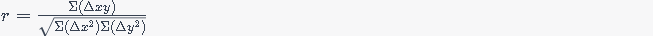

In [50]:
# Dados da amostragem
data = [['01', '6,0', '9,0', '8,0'],
         ['08', '8,0', '10,0', '7,0'],
         ['24', '7,0', '5,0', '7,0'],
         ['38', '10,0', '8,0', '4,0'],
         ['44', '6,0', '6,0', '2,0'],
         ['58', '7,0', '8,0', '9,0'],
         ['59', '9,0', '4,0', '6,0'],
         ['72', '3,0', '8,0', '2,0'],
         ['80', '8,0', '8,0', '9,0'],
         ['92', '2,0', '2,0', '7,0']]

# Transformando em dataframe
notas_df = pd.DataFrame(data, columns=['ID','NOTAS','MATEMÁTICA (X)','ESTATÍSTICA (Y)'])

# Dropando a coluna 'notas'
notas_df = notas_df.drop(columns='NOTAS')

# Convertendo as colunas para float
notas_df['MATEMÁTICA (X)'] = notas_df['MATEMÁTICA (X)'].str.replace(',', '.').astype(float)
notas_df['ESTATÍSTICA (Y)'] = notas_df['ESTATÍSTICA (Y)'].str.replace(',', '.').astype(float)

# Criando coluna de x * y
notas_df['x * y'] = notas_df['MATEMÁTICA (X)']*notas_df['ESTATÍSTICA (Y)']

# Crinado a coluna de x ao quadrado
notas_df['x ao quadrado'] = notas_df['MATEMÁTICA (X)'] ** 2

# Criando a coluna de y ao quadrado
notas_df['y ao quadrado'] = notas_df['ESTATÍSTICA (Y)'] ** 2

# Adicionar uma linha com a soma total de cada coluna
notas_df.loc['Total'] = notas_df.sum(numeric_only=True, axis=0)

# Calculando a corelação de Pearson
n = 10
soma_x = 68
soma_y = 61
soma_xy = 419
soma_x_quadrado = 518
soma_y_quadrado = 433

divisor_pearson = math.sqrt((n * soma_x_quadrado - soma_x ** 2) * (n * soma_y_quadrado - soma_y ** 2))

c_pearson = (n * soma_xy - soma_x * soma_y) / divisor_pearson


c_pearsonB = notas_sem_total['MATEMÁTICA (X)'].corr(notas_sem_total['ESTATÍSTICA (Y)'])
print(c_pearson)
print(c_pearsonB)

notas_df

0.07217773481570182
0.07217773481570186


,ID,MATEMÁTICA (X),ESTATÍSTICA (Y),x * y,x ao quadrado,y ao quadrado
0,01,9.0,8.0,72.0,81.0,64.0
1,08,10.0,7.0,70.0,100.0,49.0
2,24,5.0,7.0,35.0,25.0,49.0
3,38,8.0,4.0,32.0,64.0,16.0
4,44,6.0,2.0,12.0,36.0,4.0
5,58,8.0,9.0,72.0,64.0,81.0
6,59,4.0,6.0,24.0,16.0,36.0
7,72,8.0,2.0,16.0,64.0,4.0
8,80,8.0,9.0,72.0,64.0,81.0
9,92,2.0,7.0,14.0,4.0,49.0


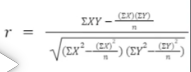

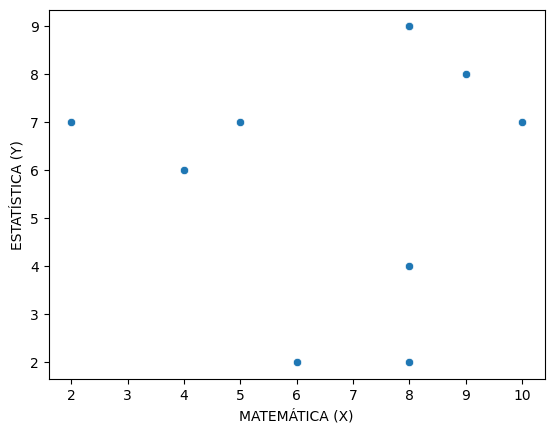

In [47]:
# Criando uma cópia do dataframe se a row de total
notas_sem_total = notas_df.loc[notas_df.index != 'Total']

# Criando o gráfico de dispersão
sns.scatterplot(data=notas_sem_total, x='MATEMÁTICA (X)', y='ESTATÍSTICA (Y)')

# Mostrando o gráfico
plt.show()